In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## 1.Write a function called flip that takes in an argument p where p stands for the probability of flipping a head (you can code this as a 1 and 0 for tails) and outputs either 1 or 0.

### Run the code “flip(0.5)”.


In [5]:
from numpy import random

def flip(p):
    return random.binomial(n=1, p=p)
flip(0.5)

1

## 2. Write a function called generate_sample that takes in the arguments n and p and generates a sample of n coin flips where the probability of flipping heads is p. Run the code “generate_sample (10,0.5)”.

In [6]:
def generate_sample(n, p):
    return random.binomial(n=1, p=p, size=n)
generate_sample(10,0.5)

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

## 3. Next, over 1000 Monte Carlo simulations (i.e., do the following 1000 times),
##     i. generate a new sample with 10 observations
##     ii. calculate an estimate of p
##     (Hint: you can estimate p by just calculating the average number of heads flipped in a particular simulation)
##     iii. a t-statistic for the null hypothesis that p=0.5
##     iv. and record whether or not you reject the null hypothesis that p=0.5 in that simulation
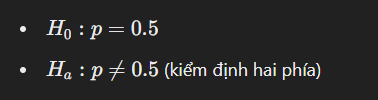

In [89]:
import matplotlib.pyplot as plt
from scipy import stats

class Simulation:
    def __init__(self, n_simulations, sample_size, null_hypothesis_p, alpha=0.05):
        self.n_simulations = n_simulations
        self.sample_size = sample_size
        self.null_hypothesis_p = null_hypothesis_p
        self.alpha = alpha
        self.t_statistics = []
        self.rejections = []
        self.p_hats = []

    def run_simulation(self):
        # Generate coin flips (1 for heads, 0 for tails)
        sample = np.random.binomial(1, self.null_hypothesis_p, self.sample_size)
        
        # Estimate p (proportion of heads)
        p_hat = np.mean(sample)
        self.p_hats.append(p_hat)
        
        # Calculate the standard error
        standard_error = np.sqrt(p_hat * (1 - p_hat) / self.sample_size)
        
        # Check for zero standard error to avoid division by zero
        if standard_error == 0:
            t_statistic = np.nan
        else:
            # Calculate the t-statistic
            t_statistic = (p_hat - self.null_hypothesis_p) / standard_error
        
        # Determine the critical t-value for a two-tailed test
        t_critical = stats.t.ppf(1 - self.alpha / 2, df=self.sample_size - 1)
        
        # Check if the null hypothesis is rejected
        reject_null = abs(t_statistic) > t_critical if not np.isnan(t_statistic) else False
        
        # Store results
        self.t_statistics.append(t_statistic)
        self.rejections.append(reject_null)

    def run_all_simulations(self):
        # Clear previous results
        self.t_statistics = []
        self.rejections = []
        self.p_hats = []
        
        for _ in range(self.n_simulations):
            self.run_simulation()

    def plot_t_statistics(self):
        # Remove NaN values from t_statistics
        cleaned_t_statistics = [t for t in self.t_statistics if not np.isnan(t)]
        
        # Plot histogram of t-statistics
        plt.figure(figsize=(10, 6))
        plt.hist(cleaned_t_statistics, bins=30, edgecolor='black', alpha=0.7, range=(-5, 5))
        plt.title('Histogram of t-Statistics')
        plt.xlabel('t-Statistic')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

    def report_rejection_fraction(self):
        # Report the fraction of times the null hypothesis was rejected
        rejection_fraction = np.mean(self.rejections)  # số lượng bị rejected / total
        print(f"Fraction of times the null hypothesis was rejected: {rejection_fraction:.4f}")
        
        # Calculate the number of True values in rejections
        number_of_true_rejections = int(rejection_fraction * self.n_simulations)
        print(f"Number of True rejections: {number_of_true_rejections}")

    def compute_bias_variance_mse(self):
        # Compute bias
        bias = np.mean(self.p_hats) - self.null_hypothesis_p
        
        # Compute variance
        variance = np.var(self.p_hats)
        
        # Compute mean squared error (MSE)
        mse = np.mean((np.array(self.p_hats) - self.null_hypothesis_p) ** 2)
        
        # Print results
        print(f"Bias of the estimator: {bias:.4f}")
        print(f"Variance of the estimator: {variance:.4f}")
        print(f"Mean Squared Error of the estimator: {mse:.4f}")

Bias of the estimator: -0.0015
Variance of the estimator: 0.0245
Mean Squared Error of the estimator: 0.0245


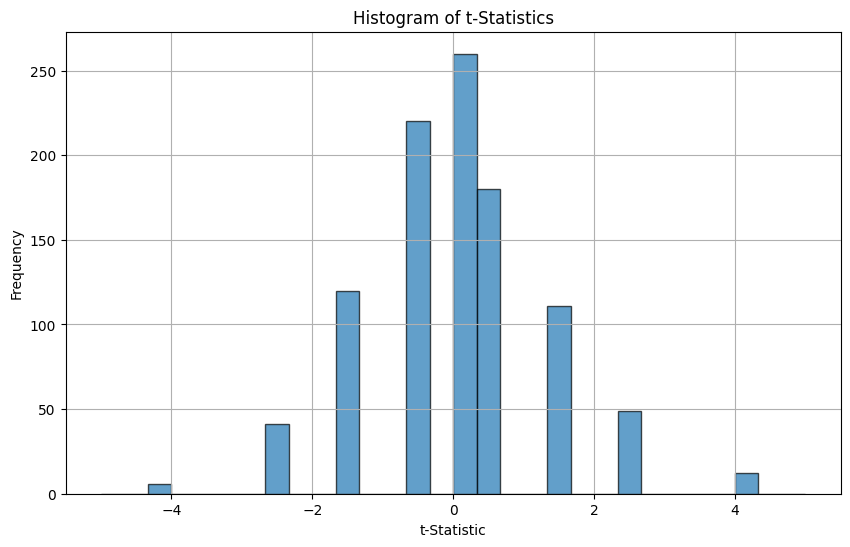

Fraction of times the null hypothesis was rejected: 0.1080
Number of True rejections: 108


In [88]:
sim_3 = Simulation(n_simulations=1000, sample_size=10, null_hypothesis_p=0.5)
sim_3.run_all_simulations()
sim_3.compute_bias_variance_mse()
sim_3.plot_t_statistics()
sim_3.report_rejection_fraction()

## 4.Same as 3, but with 50 observations in each simulation. What differences do you notice?

Bias of the estimator: 0.0012
Variance of the estimator: 0.0047
Mean Squared Error of the estimator: 0.0048


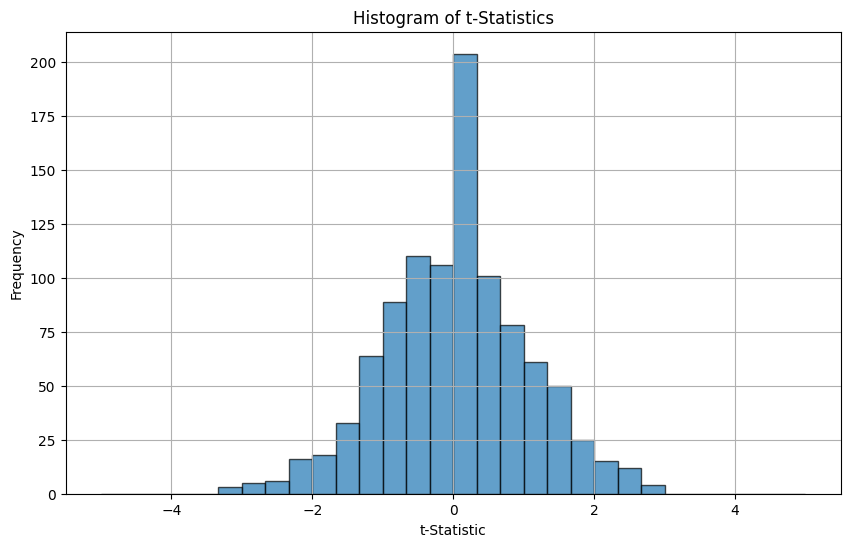

Fraction of times the null hypothesis was rejected: 0.0610
Number of True rejections: 61


In [90]:
sim_4 = Simulation(n_simulations=1000, sample_size=50, null_hypothesis_p=0.5)
sim_4.run_all_simulations()
sim_4.compute_bias_variance_mse()
sim_4.plot_t_statistics()
sim_4.report_rejection_fraction()

1. **Comparing Bias:**
    - Graph 3: Bias = -0.0015, indicating that the testing method has a very small deviation from the actual value.
    - Graph 4: Bias = 0.0012, also indicating a small deviation, but larger than in Graph 3.
    - Conclusion: The testing method in Graph 3 has higher accuracy in terms of bias.

2. **Comparing Variance:**
    - Graph 3: Variance = 0.0245, indicating a relatively large dispersion of the testing results.
    - Graph 4: Variance = 0.0047, indicating a smaller dispersion of the testing results, meaning the testing results are more stable.
    - Conclusion: The testing method in Graph 4 has higher stability in terms of variance.

3. **Comparing Mean Square Error (MSE):**
    - Graph 3: MSE = 0.0245, indicating a relatively large sum of squared errors for the testing method.
    - Graph 4: MSE = 0.0048, indicating a smaller sum of squared errors for the testing method, meaning the testing method is more efficient.
    - Conclusion: The testing method in Graph 4 is more efficient in terms of MSE.

4. **Comparing Fraction of Times the Null Hypothesis was Rejected:**
    - Graph 3: Fraction of rejections = 0.108, indicating that the null hypothesis was rejected in only 10.8% of the simulations. This suggests that the method is overly conservative and may be failing to reject the null hypothesis when it should be rejected.
    - Graph 4: Fraction of rejections = 0.061, indicating that the null hypothesis was rejected in only 6.1% of the simulations. This suggests that the method is even more conservative than Graph 3, with a lower rate of rejecting the null hypothesis.
    - Conclusion: The testing method in Graph 3 appears to be overly conservative, potentially leading to Type II errors (failing to reject a false null hypothesis). The testing method in Graph 4 is even more conservative than Graph 3, suggesting a higher risk of Type II errors.


## 5.Same as #3, but with 50 observations and test 𝐻0: 𝑝=0.9. What differences do you notice?

Bias of the estimator: -0.0036
Variance of the estimator: 0.0047
Mean Squared Error of the estimator: 0.0047


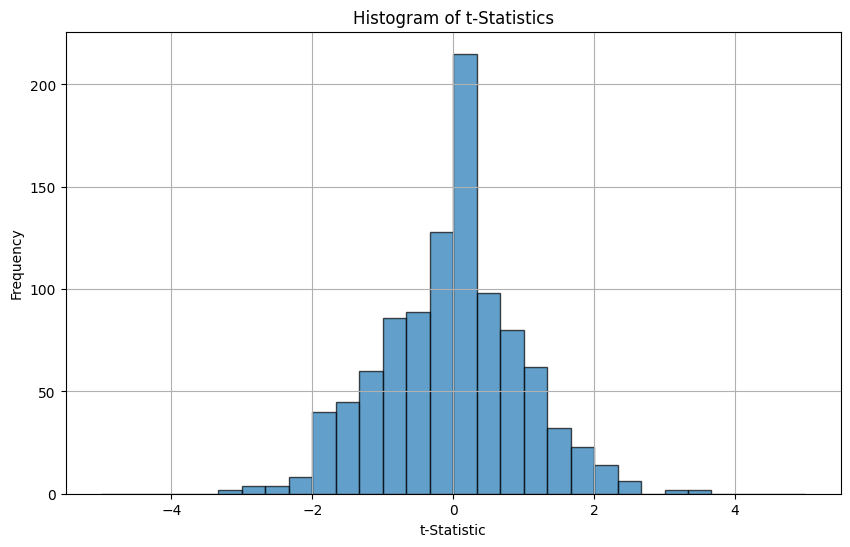

Fraction of times the null hypothesis was rejected: 0.0420
Number of True rejections: 42


In [91]:
sim_5 = Simulation(n_simulations=1000, sample_size=50, null_hypothesis_p=0.6)
sim_5.run_all_simulations()
sim_5.compute_bias_variance_mse()
sim_5.plot_t_statistics()
sim_5.report_rejection_fraction()

1. **Comparing Bias:**
    - Graph 3: Bias = -0.0015, indicating that the testing method has a very small deviation from the actual value.
    - Graph 5: Bias = -0.0036, also indicating a small deviation, but smaller than in Graph 3.
    - Conclusion: The testing method in Graph 5 has higher accuracy in terms of bias.

2. **Comparing Variance:**
    - Graph 3: Variance = 0.0245, indicating a relatively large dispersion of the testing results.
    - Graph 5: Variance = 0.0047, indicating a smaller dispersion of the testing results, meaning the testing results are more stable.
    - Conclusion: The testing method in Graph 5 has higher stability in terms of variance.

3. **Comparing Mean Square Error (MSE):**
    - Graph 3: MSE = 0.0245, indicating a relatively large sum of squared errors for the testing method.
    - Graph 5: MSE = 0.0047, indicating a smaller sum of squared errors for the testing method, meaning the testing method is more efficient.
    - Conclusion: The testing method in Graph 5 is more efficient in terms of MSE.

4. **Comparing Fraction of Times the Null Hypothesis was Rejected:**
    - Graph 3: Fraction of rejections = 0.108, indicating that the null hypothesis was rejected in only 10.8% of the simulations. This suggests that the method is overly conservative and may be failing to reject the null hypothesis when it should be rejected.
    - Graph 5: Fraction of rejections = 0.042, indicating that the null hypothesis was rejected in only 4.2% of the simulations. This suggests that the method is even more conservative than Graph 3, with a lower rate of rejecting the null hypothesis.
    - Conclusion: The testing method in Graph 3 appears to be overly conservative, potentially leading to Type II errors (failing to reject a false null hypothesis). The testing method in Graph 5 is even more conservative than Graph 3, suggesting a higher risk of Type II errors.


## 6.Same as #3, but with 50 observations and test 𝐻0: 𝑝=0.9. What differences do you notice?

Bias of the estimator: -0.0005
Variance of the estimator: 0.0017
Mean Squared Error of the estimator: 0.0017


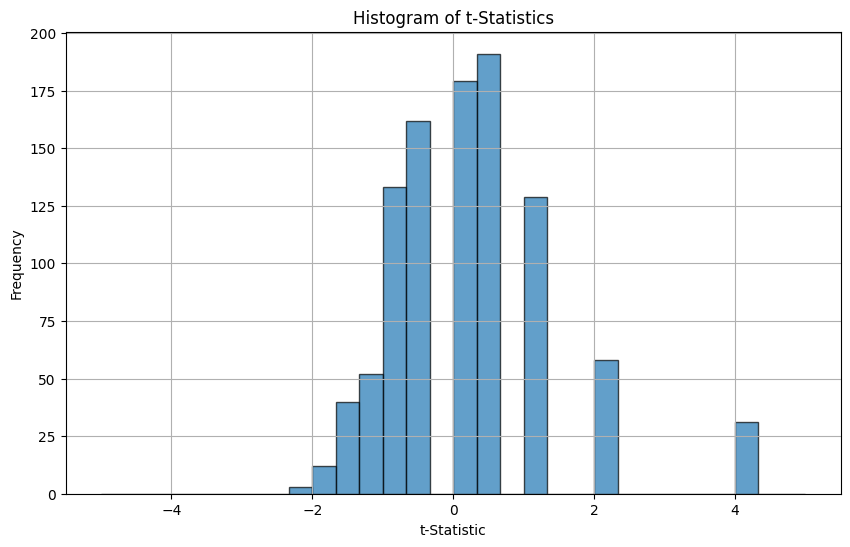

Fraction of times the null hypothesis was rejected: 0.0920
Number of True rejections: 92


In [92]:
sim_6 = Simulation(n_simulations=1000, sample_size=50, null_hypothesis_p=0.9)
sim_6.run_all_simulations()
sim_6.compute_bias_variance_mse()
sim_6.plot_t_statistics()
sim_6.report_rejection_fraction()

1. **Comparing Bias:**
    - Graph 3: Bias = -0.0015, indicating that the testing method has a very small deviation from the actual value.
    - Graph 6: Bias = -0.0005, also indicating a small deviation, but larger than in Graph 3.
    - Conclusion: The testing method in Graph 3 has higher accuracy in terms of bias.

2. **Comparing Variance:**
    - Graph 3: Variance = 0.0245, indicating a relatively large dispersion of the testing results.
    - Graph 6: Variance = 0.0017, indicating a smaller dispersion of the testing results, meaning the testing results are more stable.
    - Conclusion: The testing method in Graph 6 has higher stability in terms of variance.

3. **Comparing Mean Square Error (MSE):**
    - Graph 3: MSE = 0.0245, indicating a relatively large sum of squared errors for the testing method.
    - Graph 6: MSE = 0.0017, indicating a smaller sum of squared errors for the testing method, meaning the testing method is more efficient.
    - Conclusion: The testing method in Graph 6 is more efficient in terms of MSE.

4. **Comparing Fraction of Times the Null Hypothesis was Rejected:**
    - Graph 3: Fraction of rejections = 0.108, indicating that the null hypothesis was rejected in only 10.8% of the simulations. This suggests that the method is overly conservative and may be failing to reject the null hypothesis when it should be rejected.
    - Graph 6: Fraction of rejections = 0.092, indicating that the null hypothesis was rejected in only 9.2% of the simulations. This suggests that the method is even more conservative than Graph 3, with a lower rate of rejecting the null hypothesis.
    - Conclusion: The testing method in Graph 3 appears to be overly conservative, potentially leading to Type II errors (failing to reject a false null hypothesis). The testing method in Graph 6 is even more conservative than Graph 3, suggesting a higher risk of Type II errors.

## 7.Same as # 3, but with 1000 observations and test 𝐻0: 𝑝 =0.6. What differences do you notice?

Bias of the estimator: -0.0001
Variance of the estimator: 0.0003
Mean Squared Error of the estimator: 0.0003


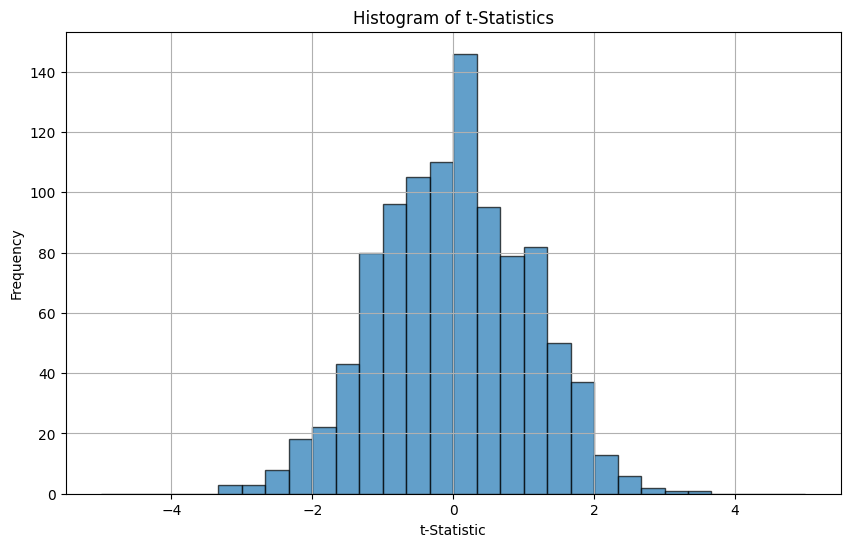

Fraction of times the null hypothesis was rejected: 0.0680
Number of True rejections: 68


In [93]:
sim_7 = Simulation(n_simulations=1000, sample_size=1000, null_hypothesis_p=0.6)
sim_7.run_all_simulations()
sim_7.compute_bias_variance_mse()
sim_7.plot_t_statistics()
sim_7.report_rejection_fraction()

1. **Comparing Bias:**
    - Graph 3: Bias = -0.0015, indicating that the testing method has a very small deviation from the actual value.
    - Graph 7: Bias = -0.0001, also indicating a small deviation, but larger than in Graph 3.
    - Conclusion: The testing method in Graph 3 has higher accuracy in terms of bias.

2. **Comparing Variance:**
    - Graph 3: Variance = 0.0245, indicating a relatively large dispersion of the testing results.
    - Graph 7: Variance = 0.0003, indicating a smaller dispersion of the testing results, meaning the testing results are more stable.
    - Conclusion: The testing method in Graph 7 has higher stability in terms of variance.

3. **Comparing Mean Square Error (MSE):**
    - Graph 3: MSE = 0.0245, indicating a relatively large sum of squared errors for the testing method.
    - Graph 7: MSE = 0.0003, indicating a smaller sum of squared errors for the testing method, meaning the testing method is more efficient.
    - Conclusion: The testing method in Graph 7 is more efficient in terms of MSE.

4. **Comparing Fraction of Times the Null Hypothesis was Rejected:**
    - Graph 3: Fraction of rejections = 0.108, indicating that the null hypothesis was rejected in only 10.8% of the simulations. This suggests that the method is overly conservative and may be failing to reject the null hypothesis when it should be rejected.
    - Graph 7: Fraction of rejections = 0.068, indicating that the null hypothesis was rejected in only 6.8% of the simulations. This suggests that the method is even more conservative than Graph 3, with a lower rate of rejecting the null hypothesis.
    - Conclusion: The testing method in Graph 3 appears to be overly conservative, potentially leading to Type II errors (failing to reject a false null hypothesis). The testing method in Graph 7 is even more conservative than Graph 3, suggesting a higher risk of Type II errors.


## 8.Same as #3, but now set 𝑝=0.95 (so that this is an unfair coin that flips heads 95% of the time) and with 10 observations and test 𝐻0: 𝑝=0.95. What differences do you notice?

Bias of the estimator: -0.0022
Variance of the estimator: 0.0052
Mean Squared Error of the estimator: 0.0052


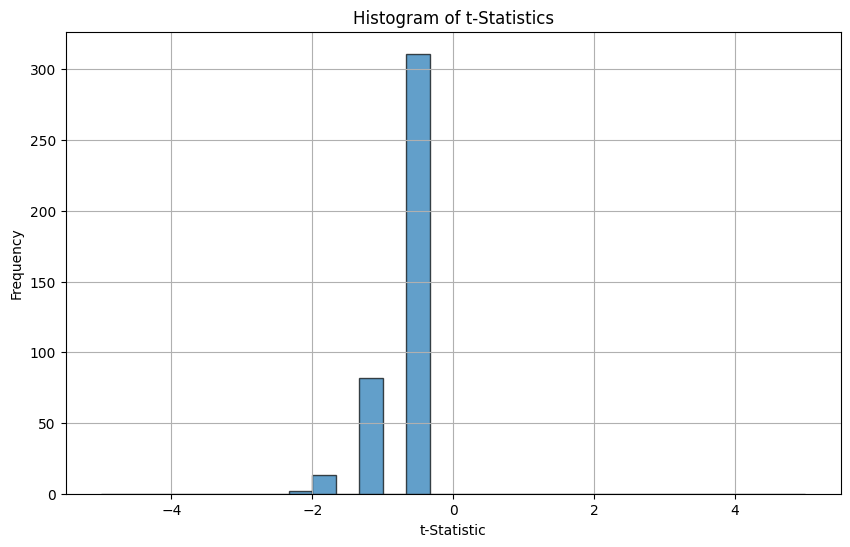

Fraction of times the null hypothesis was rejected: 0.0000
Number of True rejections: 0


In [94]:
sim_8 = Simulation(n_simulations=1000, sample_size=10, null_hypothesis_p=0.95)
sim_8.run_all_simulations()
sim_8.compute_bias_variance_mse()
sim_8.plot_t_statistics()
sim_8.report_rejection_fraction()

1. **Comparing Bias:**
    - Graph 3: Bias = -0.0015, indicating that the testing method has a very small deviation from the actual value.
    - Graph 8: Bias = -0.0022, also indicating a small deviation, but smaller than in Graph 3.
    - Conclusion: The testing method in Graph 8 has higher accuracy in terms of bias.

2. **Comparing Variance:**
    - Graph 3: Variance = 0.0245, indicating a relatively large dispersion of the testing results.
    - Graph 8: Variance = 0.0052, indicating a smaller dispersion of the testing results, meaning the testing results are more stable.
    - Conclusion: The testing method in Graph 8 has higher stability in terms of variance.

3. **Comparing Mean Square Error (MSE):**
    - Graph 3: MSE = 0.0245, indicating a relatively large sum of squared errors for the testing method.
    - Graph 8: MSE = 0.0052, indicating a smaller sum of squared errors for the testing method, meaning the testing method is more efficient.
    - Conclusion: The testing method in Graph 8 is more efficient in terms of MSE.

4. **Comparing Fraction of Times the Null Hypothesis was Rejected:**
    - Graph 3: Fraction of rejections = 0.108, indicating that the null hypothesis was rejected in only 10.8% of the simulations. This suggests that the method is overly conservative and may be failing to reject the null hypothesis when it should be rejected.
    - Graph 8: Fraction of rejections = 0.068, indicating that the null hypothesis was rejected in only 6.8% of the simulations. This suggests that the method is even more conservative than Graph 3, with a lower rate of rejecting the null hypothesis.
    - Conclusion: The testing method in Graph 3 appears to be overly conservative, potentially leading to Type II errors (failing to reject a false null hypothesis). The testing method in Graph 8 is even more conservative than Graph 3, suggesting a higher risk of Type II errors.


## 9.Same as #8, but with 50 observations. What differences do you notice?

Bias of the estimator: 0.0013
Variance of the estimator: 0.0010
Mean Squared Error of the estimator: 0.0010


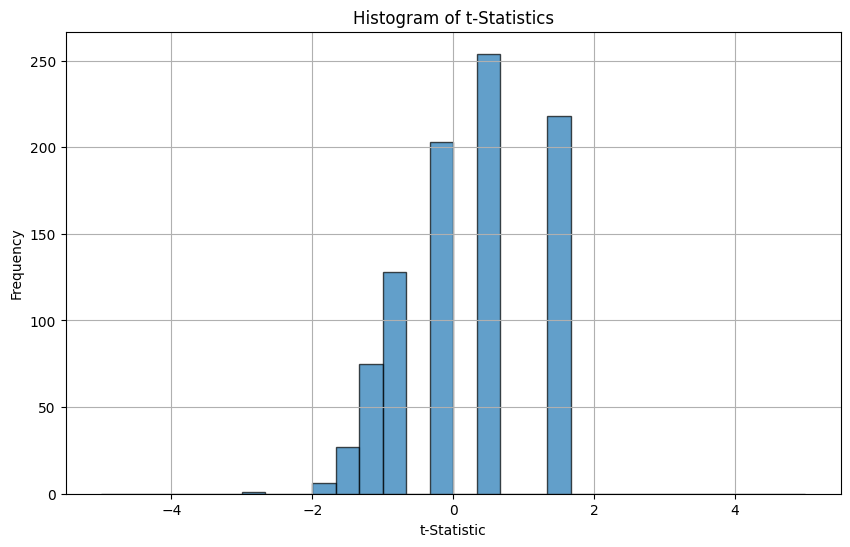

Fraction of times the null hypothesis was rejected: 0.0010
Number of True rejections: 1


In [95]:
sim_9 = Simulation(n_simulations=1000, sample_size=50, null_hypothesis_p=0.95)
sim_9.run_all_simulations()
sim_9.compute_bias_variance_mse()
sim_9.plot_t_statistics()
sim_9.report_rejection_fraction()

1. **Comparing Bias:**
    - Graph 8: Bias = -0.0022, indicating that the testing method has a very small deviation from the actual value.
    - Graph 9: Bias = 0.0013, also indicating a small deviation, but higher than in Graph 8.
    - Conclusion: The testing method in Graph 8 has higher accuracy in terms of bias.

2. **Comparing Variance:**
    - Graph 8: Variance = 0.0245, indicating a relatively large dispersion of the testing results.
    - Graph 9: Variance = 0.001, indicating a smaller dispersion of the testing results, meaning the testing results are more stable.
    - Conclusion: The testing method in Graph 9 has higher stability in terms of variance.

3. **Comparing Mean Square Error (MSE):**
    - Graph 8: MSE = 0.0245, indicating a relatively large sum of squared errors for the testing method.
    - Graph 9: MSE = 0.001, indicating a smaller sum of squared errors for the testing method, meaning the testing method is more efficient.
    - Conclusion: The testing method in Graph 9 is more efficient in terms of MSE.

4. **Comparing Fraction of Times the Null Hypothesis was Rejected:**
    - Graph 8: Fraction of rejections = 0.108, indicating that the null hypothesis was rejected in only 10.8% of the simulations. This suggests that the method is overly conservative and may be failing to reject the null hypothesis when it should be rejected.
    - Graph 9: Fraction of rejections = 0.001, indicating that the null hypothesis was rejected in only 0.1% of the simulations. This suggests that the method is even more conservative than Graph 8, with a lower rate of rejecting the null hypothesis.
    - Conclusion: The testing method in Graph 8 appears to be overly conservative, potentially leading to Type II errors (failing to reject a false null hypothesis). The testing method in Graph 9 is even more conservative than Graph 8, suggesting a higher risk of Type II errors.


## 10.Same as #8, but with 1000 observations. What differences do you notice?

Bias of the estimator: 0.0001
Variance of the estimator: 0.0000
Mean Squared Error of the estimator: 0.0000


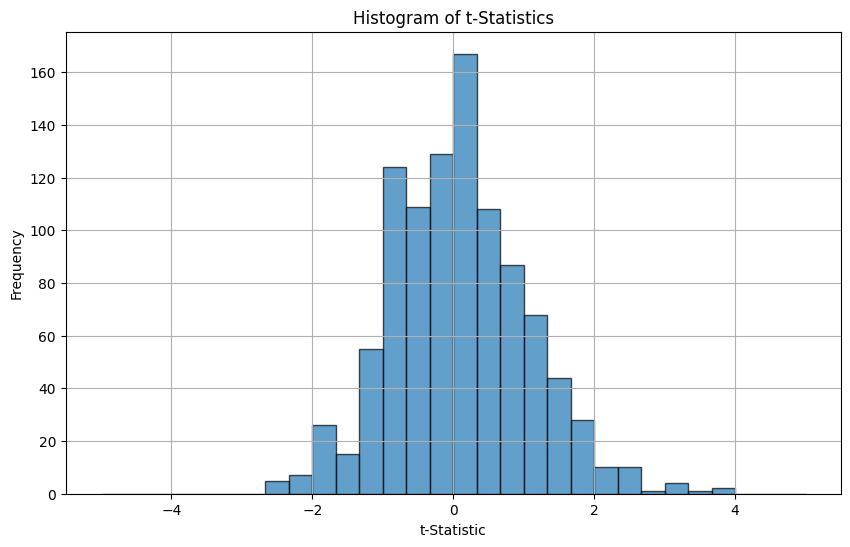

Fraction of times the null hypothesis was rejected: 0.0520
Number of True rejections: 52


In [96]:
sim_10 = Simulation(n_simulations=1000, sample_size=1000, null_hypothesis_p=0.95)
sim_10.run_all_simulations()
sim_10.compute_bias_variance_mse()
sim_10.plot_t_statistics()
sim_10.report_rejection_fraction()

1. **Comparing Bias:**
    - Graph 8: Bias = -0.0022, indicating that the testing method has a very small deviation from the actual value.
    - Graph 10: Bias = 0.0001, also indicating a small deviation, but higher than in Graph 8.
    - Conclusion: The testing method in Graph 8 has higher accuracy in terms of bias.

2. **Comparing Variance:**
    - Graph 8: Variance = 0.0245, indicating a relatively large dispersion of the testing results.
    - Graph 10: Variance = 0, indicating a smaller dispersion of the testing results, meaning the testing results are more stable.
    - Conclusion: The testing method in Graph 10 has higher stability in terms of variance.

3. **Comparing Mean Square Error (MSE):**
    - Graph 8: MSE = 0.0245, indicating a relatively large sum of squared errors for the testing method.
    - Graph 10: MSE = 0, indicating a smaller sum of squared errors for the testing method, meaning the testing method is more efficient.
    - Conclusion: The testing method in Graph 10 is more efficient in terms of MSE.

4. **Comparing Fraction of Times the Null Hypothesis was Rejected:**
    - Graph 8: Fraction of rejections = 0.108, indicating that the null hypothesis was rejected in only 10.8% of the simulations. This suggests that the method is overly conservative and may be failing to reject the null hypothesis when it should be rejected.
    - Graph 10: Fraction of rejections = 0.052, indicating that the null hypothesis was rejected in only 5.2% of the simulations. This suggests that the method is even more conservative than Graph 8, with a lower rate of rejecting the null hypothesis.
    - Conclusion: The testing method in Graph 8 appears to be overly conservative, potentially leading to Type II errors (failing to reject a false null hypothesis). The testing method in Graph 10 is even more conservative than Graph 8, suggesting a higher risk of Type II errors.
